In [161]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set(style='whitegrid')

In [163]:
df = pd.read_csv("C:/jupyter practice datasets/deliveries.csv") 

In [164]:
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [167]:
#1. Top Batsman by Runs
print(df.head(2))


   match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  

[2 rows x 21 columns]


In [169]:
# Check for missing values in each column
df.isnull().sum()


match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [171]:
df.shape
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [173]:
#Grouping by batsman and summing their runs
batsman_runs = df.groupby('batsman')['batsman_runs'].sum().reset_index()

#Sorting in descending order of total runs and selecting top 10 batsmans
top_batsmen = batsman_runs.sort_values(by='batsman_runs', ascending=False).head(10)

#Displaying the result
print(top_batsmen)

            batsman  batsman_runs
486         V Kohli          5434
428        SK Raina          5415
367       RG Sharma          4914
112       DA Warner          4741
392        S Dhawan          4632
92         CH Gayle          4560
290        MS Dhoni          4477
384      RV Uthappa          4446
26   AB de Villiers          4428
147       G Gambhir          4223


<Axes: xlabel='batsman', ylabel='batsman_runs'>

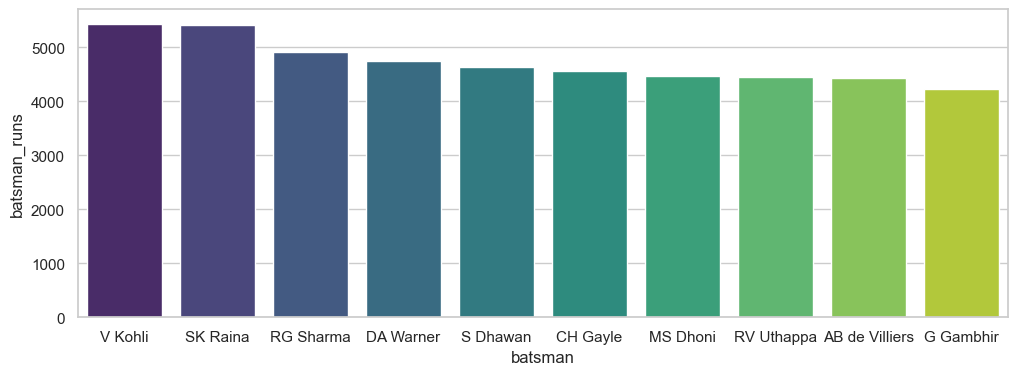

In [175]:
plt.figure(figsize=(12, 4))
sns.barplot(x='batsman', y='batsman_runs', data=top_batsmen, hue='batsman', palette='viridis')


In [176]:
#Observations:
- The top 10 batsmen have scored significantly higher runs, indicating their consistency and reliability across matches.
- Virat Kohli leads with the most runs, highlighting their key role in their team's success.
- A noticeable gap between the top 2-3 batsmen and the rest shows their dominance.
- This analysis helps teams identify players to build their batting strategies around.
- It also reveals that some players may have fewer runs despite playing many matches, suggesting room for improvement.


SyntaxError: unterminated string literal (detected at line 3) (1769053378.py, line 3)

In [ ]:
#2 Top Bowlers by Wickets


In [179]:
# Create a wickets column by counting non-null values in player_dismissed
df['wickets'] = df['player_dismissed'].notna().astype(int)

# Grouping by bowler & summing the wickets
top_bowlers = df.groupby('bowler')['wickets'].sum().reset_index()

# Sorting in descending order and selecting the top 10 bowlers
top_bowlers = top_bowlers.sort_values(by='wickets', ascending=False).head(10)

# Display the result
print(top_bowlers)




              bowler  wickets
340       SL Malinga      188
93          DJ Bravo      168
7           A Mishra      165
126  Harbhajan Singh      161
264        PP Chawla      156
53           B Kumar      141
269         R Ashwin      138
347        SP Narine      137
381         UT Yadav      136
281    R Vinay Kumar      127


# Grouped by bowler and count the number of wickets
bowler_wickets = wickets_df.groupby('bowler').size().reset_index(name='wickets')

# Displayed the top 10 bowlers with the most wickets
top_bowlers = bowler_wickets.sort_values(by='wickets', ascending=False).head(10)

print(top_bowlers)


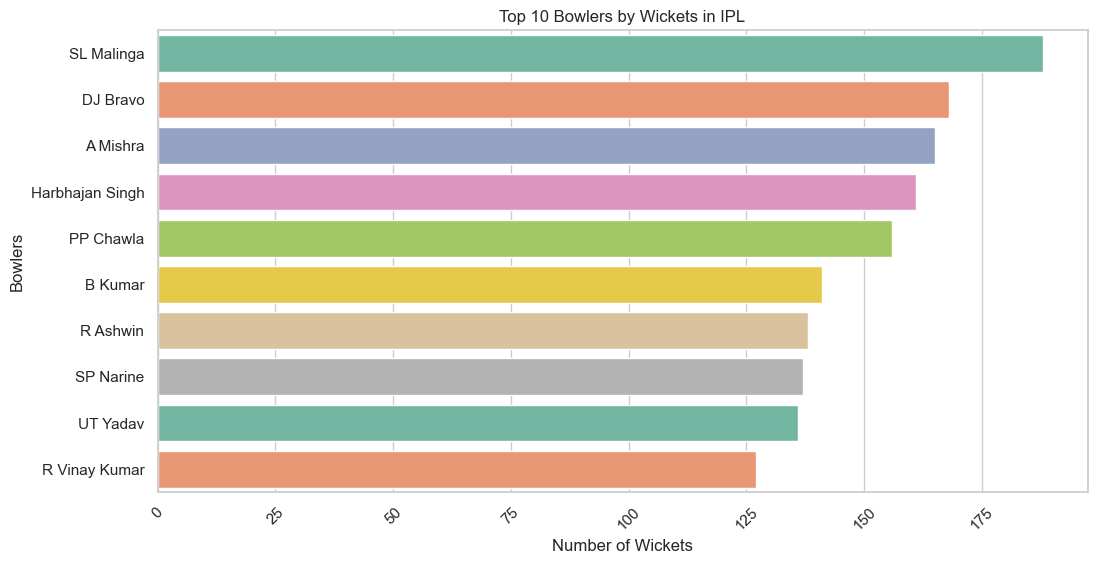

In [182]:

# Visualized the top bowlers by wickets
plt.figure(figsize=(12, 6))
sns.barplot(x='wickets', y='bowler', data=top_bowlers, hue='bowler', palette='Set2', legend=False)

plt.title('Top 10 Bowlers by Wickets in IPL')
plt.xlabel('Number of Wickets')
plt.ylabel('Bowlers')
plt.xticks(rotation=45)
plt.show()


In [183]:
#Observations:
- The top 10 bowlers are responsible for most of the critical dismissals across matches.
- Lasith Malinga leads with the highest number of wickets, reflecting their effectiveness and impact on the game.
- The dominance of fast bowlers/spinners can be identified by the names in the list (if applicable).
- A narrow difference between the top wicket-takers indicates healthy competition.
- Teams can leverage this analysis to strengthen their bowling strategies and focus on key bowlers during player selections.


SyntaxError: invalid syntax (4239581675.py, line 2)

In [ ]:
#3.Run Distribution by Over
# Grouped by over column and sum the runs scored in each over
runs_by_over = df.groupby('over')['total_runs'].sum().reset_index()

# Displaying the results
print(runs_by_over)


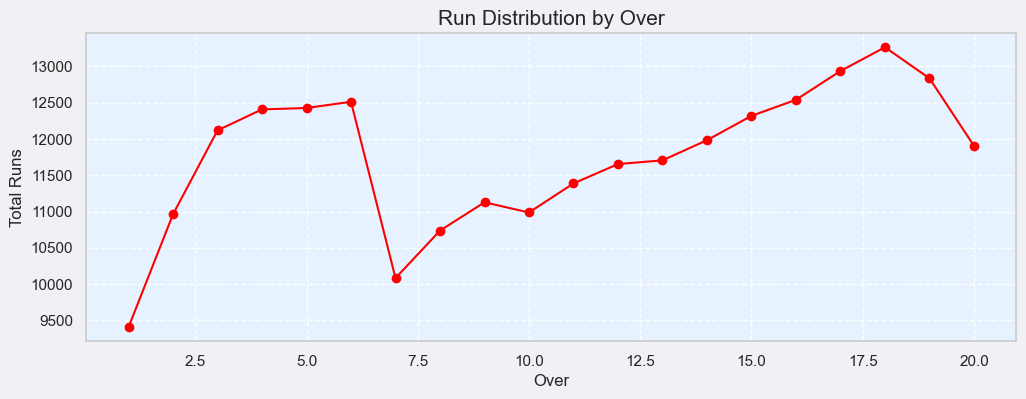

In [187]:
# Create the figure & axes
fig, ax = plt.subplots(figsize=(12, 4))

# Plotting the line chart
ax.plot(runs_by_over['over'], runs_by_over['total_runs'], marker='o', linestyle='-', color='red')

# Customize background colors
fig.patch.set_facecolor('#f0f0f5')  # Figure background color (outside plot)
ax.set_facecolor('#e6f2ff')  # Plot area background color

# Adding labels and title
ax.set_xlabel('Over', fontsize=12)
ax.set_ylabel('Total Runs', fontsize=12)
ax.set_title('Run Distribution by Over', fontsize=15)

# Add gridlines for better readability
ax.grid(color='white', linestyle='--', linewidth=1)

plt.show()




In [189]:
#Observations:
- The powerplay overs (1-6) show a relatively high scoring rate, as teams take advantage of fielding restrictions.
- Scoring tends to slow down during the middle overs (7-15), as teams consolidate after the powerplay.
- The death overs (16-20) display a sharp rise in runs, reflecting aggressive hitting in the final overs.
- This pattern helps teams plan their strategies, such as field placements and bowling rotations, for different phases of the game.
- Identifying teams that perform well in specific overs can offer insights into their strengths (e.g., powerplay specialists).


SyntaxError: invalid syntax (1392577857.py, line 2)

In [191]:
#4.Extras Breakdown

In [193]:
# Summing the different types of extras
extras_breakdown = df[['wide_runs', 'noball_runs', 'bye_runs', 'legbye_runs', 'penalty_runs']].sum()

# Converting to a DataFrame for better readability
extras_breakdown = extras_breakdown.reset_index()
extras_breakdown.columns = ['Extra Type', 'Runs']

# Display the results
print(extras_breakdown)


     Extra Type  Runs
0     wide_runs  6576
1   noball_runs   749
2      bye_runs   884
3   legbye_runs  3785
4  penalty_runs    10


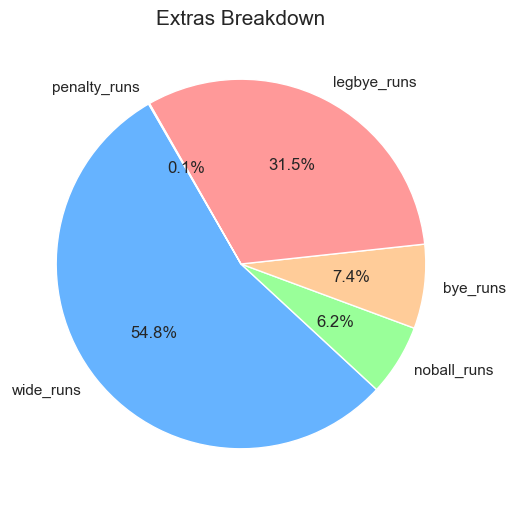

In [195]:
plt.figure(figsize=(6, 6))
plt.pie(extras_breakdown['Runs'], labels=extras_breakdown['Extra Type'], 
autopct='%1.1f%%', startangle=120, colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999', '#c2c2f0'])

# Adding a title
plt.title('Extras Breakdown', fontsize=15)
plt.show()


In [197]:
#Observations:
- Wides and no-balls appear to be the most frequent extras, indicating areas where bowlers may lose control.
- Byes and leg-byes are less common but still contribute to the total extras, often due to missed opportunities by the wicketkeeper.
- Frequent wides and no-balls can give away free runs, putting teams at a disadvantage.
- Teams with higher extras may need to work on bowling discipline and wicketkeeping techniques to minimize such errors.
- This analysis can help teams target areas where they tend to lose unnecessary runs, leading to improved performance.


SyntaxError: invalid syntax (3786251655.py, line 2)

In [199]:
#5.Dismissal Types
# Printed the columns in the DataFrame to check available column names
print("Column_in_DataFrame:")
print(df.columns.tolist())


Column_in_DataFrame:
['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind', 'fielder', 'wickets']


In [240]:
# Filter out rows where no player was dismissed
dismissals = df[df['dismissal_kind'].notna()]

# Group by dismissal_kind and count occurrences
dismissal_types = dismissals['dismissal_kind'].value_counts().reset_index()
dismissal_types.columns = ['Dismissal Type', 'Count']
print(dismissal_types)

          Dismissal Type  Count
0                 caught   5348
1                 bowled   1581
2                run out    852
3                    lbw    540
4                stumped    278
5      caught and bowled    211
6           retired hurt     12
7             hit wicket     10
8  obstructing the field      2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9044\2103208802.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dismissal Type', y='Count', data=dismissal_types, palette='Set2')


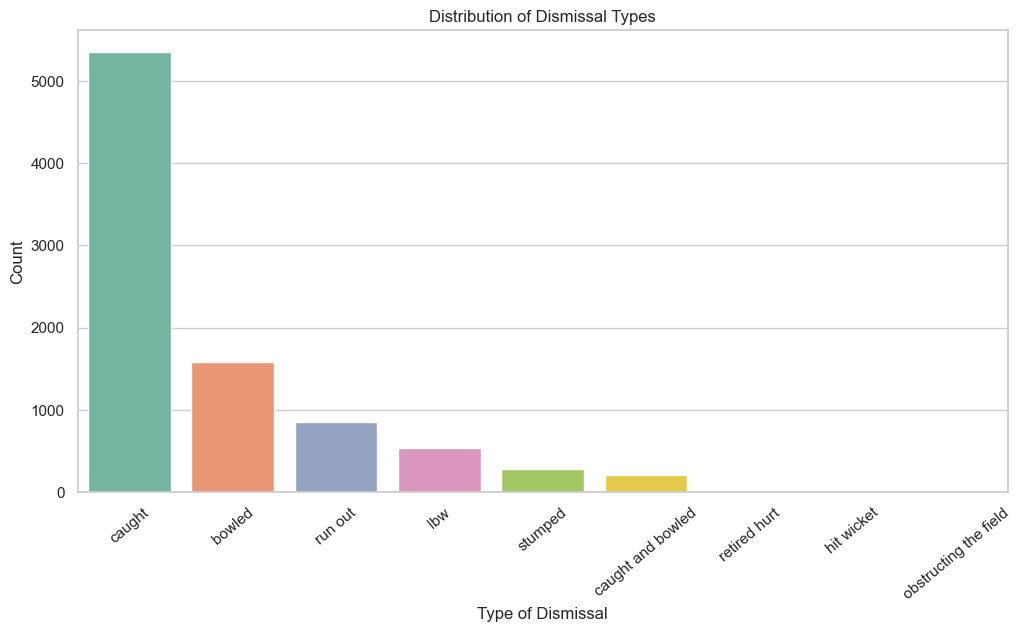

In [238]:



# Create a bar plot for the distribution of dismissal types
plt.figure(figsize=(12, 6))
sns.barplot(x='Dismissal Type', y='Count', data=dismissal_types, palette='Set2')

# Add titles and labels
plt.title('Distribution of Dismissal Types')
plt.xlabel('Type of Dismissal')
plt.ylabel('Count')
plt.xticks(rotation=40)

# Show the plot
plt.show()


In [205]:
#Observations:
- Caught is the most common type of dismissal, indicating that bowlers successfully induce false shots from batsmen.
- Bowled dismissals are frequent as well, reflecting the skill of bowlers in hitting the stumps.
- LBW and run-outs are also significant contributors, often highlighting strategic bowling and fielding efforts.
- Teams that rely heavily on catches and bowled dismissals might indicate a focus on pace or spin strategies.
- This analysis provides insights into how wickets are taken, allowing teams to design their bowling strategies accordingly.


SyntaxError: invalid syntax (2315596456.py, line 2)

In [207]:
# Group by 'batting_team' and sum the 'total_runs'
team_performance = df.groupby('batting_team')['total_runs'].sum().reset_index()

# Sorting the teams by total runs for better visualization
team_performance = team_performance.sort_values(by='total_runs', ascending=False)

# Display the result
print(team_performance)


                   batting_team  total_runs
8                Mumbai Indians       29809
13  Royal Challengers Bangalore       28126
5               Kings XI Punjab       27893
7         Kolkata Knight Riders       27419
0           Chennai Super Kings       26418
3              Delhi Daredevils       24388
10             Rajasthan Royals       22431
14          Sunrisers Hyderabad       17059
1               Deccan Chargers       11463
9                 Pune Warriors        6358
4                 Gujarat Lions        4862
2                Delhi Capitals        2630
11       Rising Pune Supergiant        2470
12      Rising Pune Supergiants        2063
6          Kochi Tuskers Kerala        1901


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9044\1477052427.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_runs', y='batting_team', data=team_performance, palette='coolwarm')


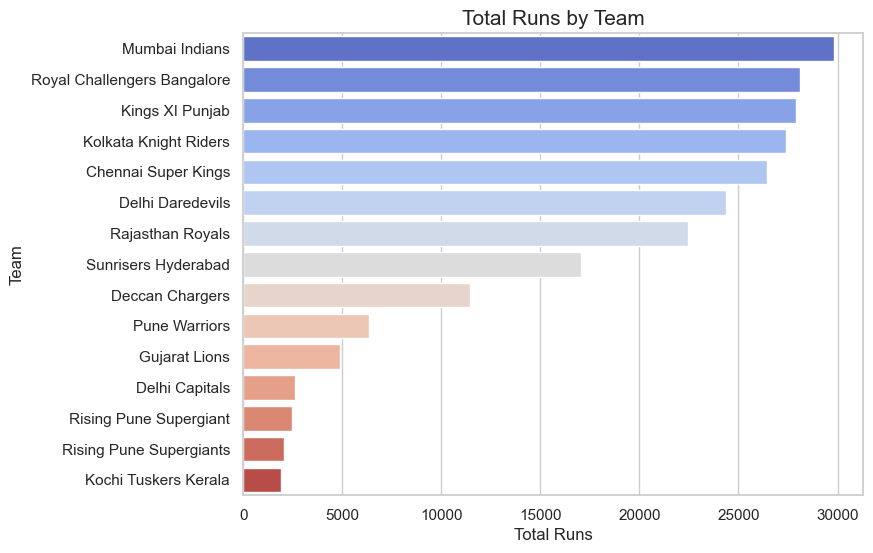

In [209]:
# Plotting the horizontal bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='total_runs', y='batting_team', data=team_performance, palette='coolwarm')

# Adding labels and title
plt.xlabel('Total Runs', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.title('Total Runs by Team', fontsize=15)

# Show the plot
plt.show()


In [211]:
#Observations:
- Teams like Mumbai Indians,RCB & KXIP have consistently scored high runs across matches, reflecting strong batting line-ups.
- Middle-tier teams show a smaller margin of difference, indicating competitive performances.
- Lower-performing teams may struggle with batting depth, requiring improvements in strategy and player selection.
- This analysis allows teams to evaluate their consistency over time and identify key areas for improvement.
- Teams with high total runs can also explore areas like strike rates and individual contributions to further enhance their performance.


SyntaxError: invalid syntax (191287922.py, line 2)